In [19]:
import numpy as np
from matplotlib import pyplot as plt
from numba import jit, prange
from IPython.display import clear_output

Part 1: Test if a child can be related to its parents

In [110]:
def genes(k, n):
    genes = np.arange(n)+1
    mother = np.sort(np.random.choice(genes, k, replace=False))
    father = np.sort(np.random.choice(genes, k, replace=False))
    child = np.sort(np.random.choice(genes, k, replace=False))
    return mother, father, child

def is_related(mother, father, child):
    for i in range(len(child)):
        if not child[i] in mother and not child[i] in father:
            return False
    return True

# def is_related(mother, father, child):
#     return np.all(np.isin(child, [mother, father]))

In [125]:
mor, far, barn = genes(2, 5)
mor, far, barn, is_related(mor, far, barn)

(array([4, 5]), array([2, 3]), array([3, 5]), True)

In [9]:
list(np.array([1,2,3]))

[1, 2, 3]

In [2]:
@jit(nopython=True)
def genes(k, n):
    genes = np.arange(n)+1
    mother = np.sort(np.random.choice(genes, k, replace=False))
    father = np.sort(np.random.choice(genes, k, replace=False))
    child = np.sort(np.random.choice(genes, k, replace=False))
    return mother, father, child

@jit(nopython=True)
def isin(mother, father, gene):
    for i in range(len(mother)):
        if gene == mother[i] or gene == father[i]:
            return True
    return False

@jit(nopython=True)
def is_related(mother, father, child):
    for i in range(len(child)):
        if not isin(mother, father, child[i]):
            return False
    return True

@jit(nopython=True, parallel = True)
def probability(k, n, iterations):
    p = 0
    for i in prange(iterations):
        mother, father, child = genes(k, n)
        if is_related(mother, father, child):
            p += 1
    return p/iterations

@jit(nopython=True)
def monte_carlo(N, iterations, table):
    for n in range(1, N+1):
        for k in range(1, n+1):
            print(n,k)
            table[n-1, k-1] += probability(k, n, iterations)
    return table

# @jit(nopython=True)
# def is_related(mother, father, child):
#     pool = np.concatenate((mother, father))
#     return np.all(np.isin(child, pool))

In [182]:
a = monte_carlo(20, 1000000, np.zeros([20,20], dtype = np.float64))
a

1 1
2 1
2 2
3 1
3 2
3 3
4 1
4 2
4 3
4 4
5 1
5 2
5 3
5 4
5 5
6 1
6 2
6 3
6 4
6 5
6 6
7 1
7 2
7 3
7 4
7 5
7 6
7 7
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
15 15
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
16 11
16 12
16 13
16 14
16 15
16 16
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
17 11
17 12
17 13
17 14
17 15
17 16
17 17
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
18 11
18 12
18 13
18 14
18 15
18 16
18 17
18 18
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
19 15
19 16
19 17
19 18
19 19
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8


array([[1.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      ],
       [0.749242, 1.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      ],
       [0.55608 , 0.777191, 1.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      ],
       [0.437153, 0.527971, 0.81252 , 1.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      ],
       [0.359292, 0.370289, 0.550066, 0.840277, 1.      , 0.      ,


<IPython.core.display.Javascript object>


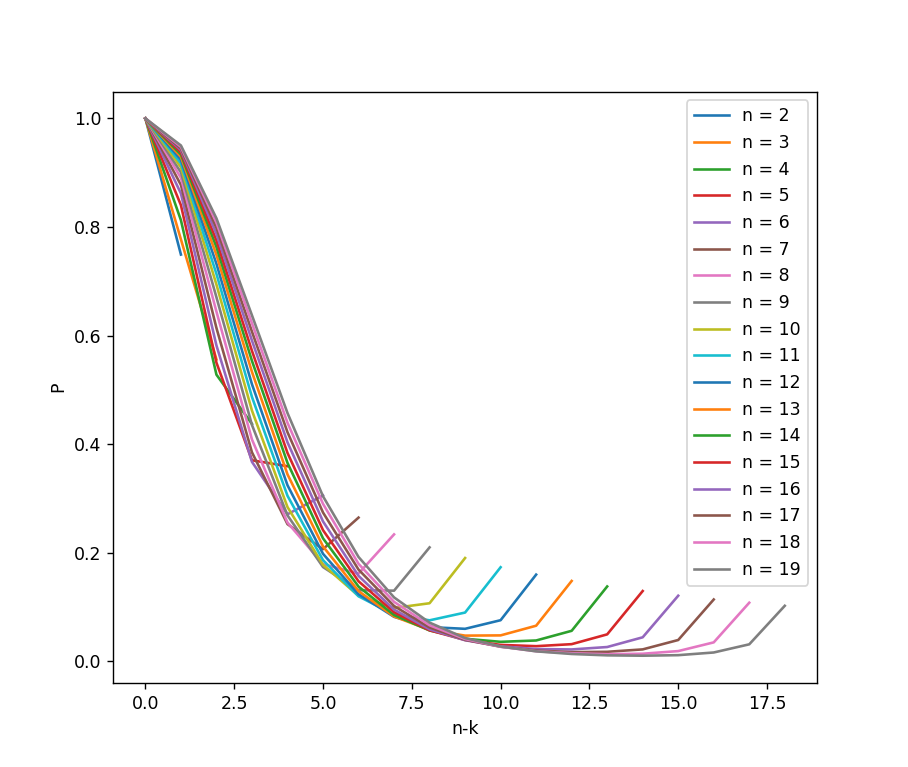

In [185]:
%matplotlib notebook
plt.xlabel("n-k")
plt.ylabel("P")
for i in range(1, 19):
    plt.plot(-1*(np.arange(20)[-i-1:]-19), a[i,:i+1], label = "n = %i" %(i+1))
plt.legend()

Del 2: Restriksjonsenzym og CRISPR

In [118]:
def complementary(DNA, mRNA = False):
    complement = DNA.copy()
    for i in range(len(DNA)):
        if DNA[i] == 'A':
            if mRNA:
                complement[i] = 'U'
            else:
                complement[i] = 'T'
        elif DNA[i] == 'T':
            complement[i] = 'A'
        elif DNA[i] == 'G':
            complement[i] = 'C'
        elif DNA[i] == 'C':
            complement[i] = 'G'
    return complement
    
def print_DNA(DNA1, DNA2):
    print1 = ""
    print2 = ""
    for i in range(len(DNA1)):
        print1 += DNA1[i]
        print2 += DNA2[i]
    print(print1)
    print(print2)

In [175]:
# baser = np.array(['A', 'T', 'G', 'C'])
# DNA1 = np.random.choice(baser, 100)
# DNA2 = complementary(DNA1)
# print_DNA(DNA1, DNA2)

TGGAACCCGTCCCAGAGGCCGGATGTGATGGTAACGGTATCACGACAGCCACTGATTTAATGTTAGAGAAGTTGAACTCATTTGACTGTATTGGGTCCAA
ACCTTGGGCAGGGTCTCCGGCCTACACTACCATTGCCATAGTGCTGTCGGTGACTAAATTACAATCTCTTCAACTTGAGTAAACTGACATAACCCAGGTT


In [50]:
DNA1 = None

In [116]:
def count_AATT(DNA):
    count = 0
    for i in range(len(DNA)-3):
        if DNA[i] == 'A' and DNA[i+1] == 'A' and DNA[i+2] == 'T' and DNA[i+3] == 'T':
            count += 1
        elif DNA[i] == 'T' and DNA[i+1] == 'T' and DNA[i+2] == 'A' and DNA[i+3] == 'A':
            return 0
    return count

def generate_DNA(N, occurences):
    baser = np.array(['A', 'T', 'G', 'C'])
    DNA1 = np.random.choice(baser, N)
    count = count_AATT(DNA1)
    while count != occurences:
        DNA1 = np.random.choice(baser, N)
        count = count_AATT(DNA1)
    DNA2 = complementary(DNA1)
    return DNA1, DNA2

def generate_gene(N):
    baser = np.array(['A', 'T', 'G', 'C'])
    gene1 = np.random.choice(baser, N+4)
    gene2 = complementary(gene1)
    gene2 = np.roll(gene2, -4)
    gene2[-4], gene1[0] = 'T', 'A'
    gene2[-3], gene1[1] = 'T', 'A'
    gene2[-2], gene1[2] = 'A', 'T'
    gene2[-1], gene1[3] = 'A', 'T'
    return gene1, gene2

def print_gene(gene1, gene2):
    print1 = ""
    print2 = "    "
    for i in range(len(gene1)):
        print1 += gene1[i]
        print2 += gene2[i]
    print1 += "    "
    print(print1)
    print(print2)

In [1]:
def find_AATT(DNA):
    ind = 0
    for i in range(len(DNA)-3):
         if DNA[i] == 'A' and DNA[i+1] == 'A' and DNA[i+2] == 'T' and DNA[i+3] == 'T':
                return i
    print("None was found")
    return None

def CRISPR_bacteria(gene1, gene2, DNA1, DNA2):
    ind = find_AATT(DNA1)
    gene1 = np.char.lower(gene1)
    gene2 = np.char.lower(gene2)
    new_DNA1 = np.concatenate([DNA1[:ind], gene1, DNA1[ind:]])
    new_DNA2 = np.concatenate([DNA2[:ind+4], gene2, DNA2[ind+4:]])
    return new_DNA1, new_DNA2

In [15]:
gen1, gen2 = generate_gene(10)
print_gene(gen1, gen2)

AATTTGCCAGTAAC    
    ACGGTCATTGTTAA


In [17]:
DNA1, DNA2 = generate_DNA(30, 1)
print_DNA(DNA1, DNA2)

GCACCTGCATGTGCTCGTCTGGAATTCGAT
CGTGGACGTACACGAGCAGACCTTAAGCTA


In [18]:
# DNA1, DNA2 = generate_DNA(50, 1)
# gen1, gen2 = generate_gene(20)
CRISPR1, CRISPR2 = CRISPR_bacteria(gen1, gen2, DNA1, DNA2)
print_DNA(CRISPR1, CRISPR2)

GCACCTGCATGTGCTCGTCTGGaatttgccagtaacAATTCGAT
CGTGGACGTACACGAGCAGACCTTAAacggtcattgttaaGCTA


In [114]:
def CRISPR(DNA, gen_ut, gen_inn):
    for i in range(len(DNA)-len(gen_ut)):
        match = True
        for j in range(len(gen_ut)):
            if DNA[i+j] != gen_ut[j]:
                match = False
        if match:
            return DNA[:i] + gen_inn + DNA[i+len(gen_ut):]
    return DNA

In [124]:
DNA_sick = list(generate_DNA(30, 0)[0])
DNA_healthy = CRISPR(DNA_sick, ['G', 'A', 'T'], ['C', 'A', 'T'])
print_DNA(DNA_sick, DNA_healthy)

ACTTGTGATAGCTACGACCTGCCGGGTCGT
ACTTGTCATAGCTACGACCTGCCGGGTCGT


Del 3: Elektroforese

In [16]:
def generate_DNA_sample(N, L0, L, pool = []):
    if len(pool) == 0:
        Ls = np.arange(L0, L+1)
    else:
        Ls = pool
    return np.random.choice(Ls, N, replace=False)

In [106]:
def elektroforese(N, sample1, sample2, sample3, dt):
    L_max = 1 + np.amax([sample1, sample2, sample3])
    L_min = np.amin([sample1, sample2, sample3]) + 1
    y1, y2, y3 = np.zeros(N), np.zeros(N), np.zeros(N)
    i = 1
    while np.all(y1 < 1) and np.all(y2 < 1) and np.all(y3 < 1):
        y1 += (L_max - sample1)*dt
        y2 += (L_max - sample2)*dt
        y3 += (L_max - sample3)*dt
        
        plt.hlines(1 - (np.arange(L_min, L_max+2)-L_min)*dt*i, 0.5, 3.5, linewidth=0.1)
        plt.plot(np.ones(N)*1, 1 - y1, '_', markersize = 30)
        plt.plot(np.ones(N)*2, 1 - y2, '_', markersize = 30)
        plt.plot(np.ones(N)*3, 1 - y3, '_', markersize = 30)
        plt.ylim(-0.1, 1)
        plt.xlim(0.5, 3.5)
        plt.title("Mor                         Far                      Barn")
        plt.show()
        clear_output(wait=True)
        i += 1
    

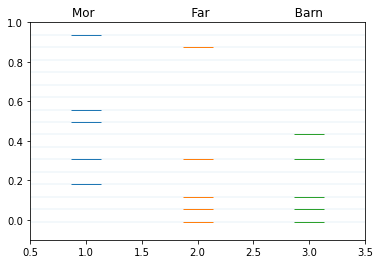

In [113]:
N, L0, L = 5, 5, 20
sample1 = generate_DNA_sample(N, L0, L)
sample2 = generate_DNA_sample(N, L0, L)
sample3 = generate_DNA_sample(N, L0, L) #, pool = np.concatenate([sample1, sample2]))
elektroforese(N, sample1, sample2, sample3, 0.001)

# print(is_related(sample1, sample2, sample3))